In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 25s 2us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [8]:
single_image = x_train[0]

In [9]:
single_image.shape

(28, 28)

In [10]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

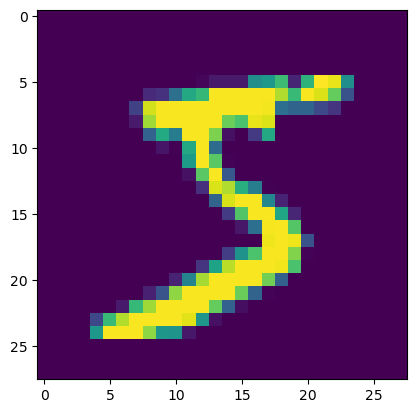

In [11]:
plt.imshow(single_image)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
#one-hot-encoding

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(60000,)

In [18]:
y_example = to_categorical(y_train)

In [19]:
y_example.shape

(60000, 10)

In [20]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
y_example[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
#converting both y_train and y_test labels to categorical

In [23]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [24]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [25]:
#normalizaing training data

In [26]:
single_image.max()

255

In [27]:
sinlge_image.min()

0

In [28]:
#should be between 0 to 1

In [29]:
x_train = x_train/255

In [30]:
x_test = x_test/255

In [31]:
scaled_image = x_train[0]

In [32]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
scaled_image.max()

1.0

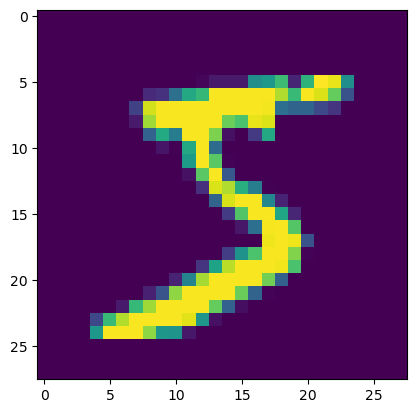

In [34]:
plt.imshow(scaled_image)

In [35]:
x_train.shape

(60000, 28, 28)

In [36]:
#batch_size,width,height,color_channels
x_train = x_train.reshape(60000,28,28,1)

In [37]:
x_test = x_test.reshape(10000,28,28,1)

In [38]:
#creating and evalutig model

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [43]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/


In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [47]:
#training the model

In [48]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1329 - accuracy: 0.9592 - val_loss: 0.0565 - val_accuracy: 0.9808
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.0435 - val_accuracy: 0.9859
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0299 - accuracy: 0.9906 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0367 - val_accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0146 - accuracy: 0.9956 - val_loss: 0.0402 - val_accuracy: 0.9882
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0112 - accuracy: 0.9964 - val_loss: 0.0472 - val_accuracy: 0.9861


In [50]:
#Evaluating the model

In [51]:
model.metrics_names

['loss', 'accuracy']

In [52]:
losses = pd.DataFrame(model.history.history)

In [53]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.132911,0.959217,0.056505,0.9808
1,0.047511,0.985100,0.043550,0.9859
2,0.029935,0.990650,0.043458,0.9858
3,0.020435,0.993750,0.036736,0.9888
4,0.014550,0.995633,0.040228,0.9882


<AxesSubplot:>

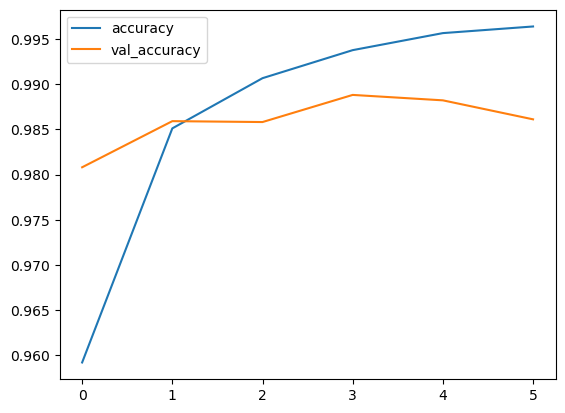

In [54]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

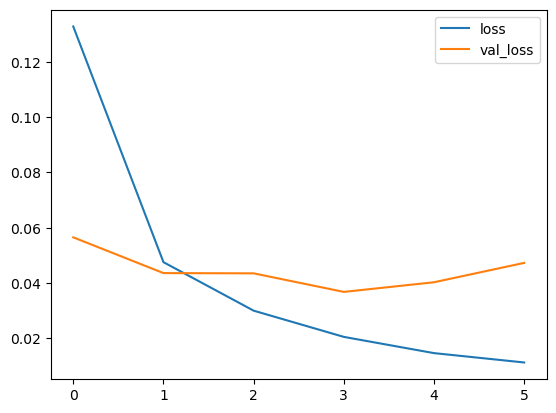

In [55]:
losses[['loss','val_loss']].plot()

In [56]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.047245897352695465, 0.9861000180244446]


In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
predictions = np.argmax(model.predict(x_test),axis=1)

313/313 [==============================] - 2s 6ms/step


In [63]:
y_cat_test.shape

(10000, 10)

In [64]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [66]:
confusion_matrix(y_test,predictions)

array([[ 965,    2,    3,    1,    2,    1,    3,    0,    0,    3],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   0,    2, 1022,    1,    2,    0,    0,    4,    1,    0],
       [   0,    0,    0, 1006,    0,    1,    0,    1,    2,    0],
       [   0,    0,    2,    0,  972,    0,    1,    1,    0,    6],
       [   2,    0,    0,    9,    0,  877,    1,    0,    2,    1],
       [   1,    6,    1,    0,    4,    2,  939,    0,    5,    0],
       [   0,    1,    5,    1,    0,    0,    0, 1017,    1,    3],
       [   4,    1,    3,    0,    1,    1,    0,    3,  958,    3],
       [   0,    1,    0,    6,   15,    4,    0,    9,    2,  972]],
      dtype=int64)

In [68]:
import seaborn as sns

<AxesSubplot:>

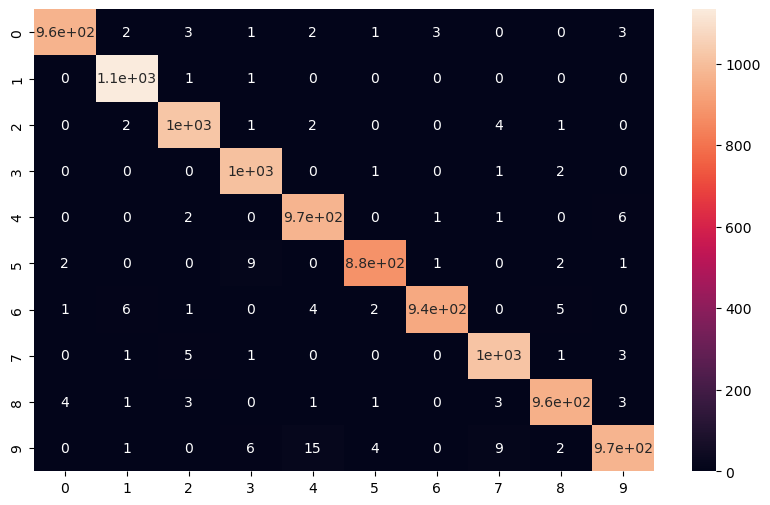

In [71]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)